Cohen's kappa: 0.7412933735745679


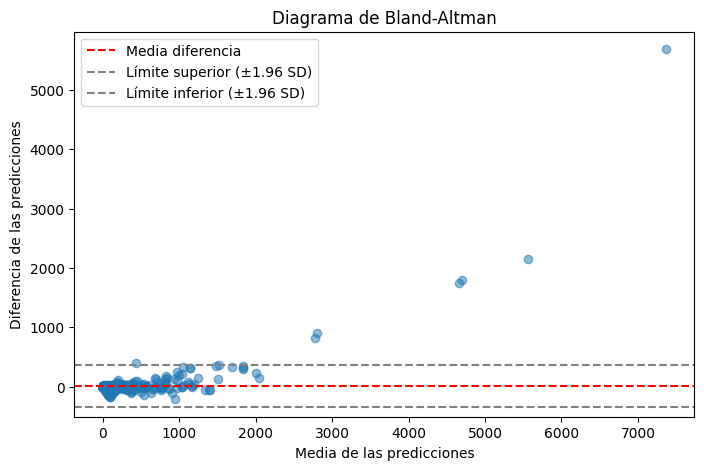

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

#Carga las predicciones de los modelos 
pred1 = np.load('y_pred_model1.npy')
pred2 = np.load('y_pred_model2.npy')

# Convierte las predicciones continuas en categoricas
n_bins = 4
pred1_cat = pd.qcut(pred1, q=n_bins, labels=False, duplicates='drop')
pred2_cat = pd.qcut(pred2, q=n_bins, labels=False, duplicates='drop')

# Calcula y muestra el coeficiente kappa de Cohen
print("Cohen's kappa:", cohen_kappa_score(pred1_cat, pred2_cat))

# Diagrama de Bland-Altman  
# Calcular medias y diferencias
means = (pred1 + pred2) / 2
diffs = pred1 - pred2

# Calcular media y límites de acuerdo
mean_diff = np.mean(diffs)
std_diff = np.std(diffs)
loa_upper = mean_diff + 1.96 * std_diff
loa_lower = mean_diff - 1.96 * std_diff

# Graficar
plt.figure(figsize=(8,5))
plt.scatter(means, diffs, alpha=0.5)
plt.axhline(mean_diff, color='red', linestyle='--', label='Media diferencia')
plt.axhline(loa_upper, color='gray', linestyle='--', label='Límite superior (±1.96 SD)')
plt.axhline(loa_lower, color='gray', linestyle='--', label='Límite inferior (±1.96 SD)')
plt.xlabel('Media de las predicciones')
plt.ylabel('Diferencia de las predicciones')
plt.title('Diagrama de Bland-Altman')
plt.legend()
plt.show()